Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Importing Skin Cancer Data**

To do: Take necessary actions to read the data

**Importing all the important libraries**

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/drive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118



**Load using keras.preprocessing**

Let's load these images off disk using the helpful image_dataset_from_directory utility.



**Create a dataset**

Define some parameters for the loader:


In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [17]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
    seed=123,validation_split= 0.2,subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width,while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
    seed=123,validation_split= 0.2,subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Visualize the data**

*Todo, create a code to visualize one instance of all the nine classes present in the dataset*





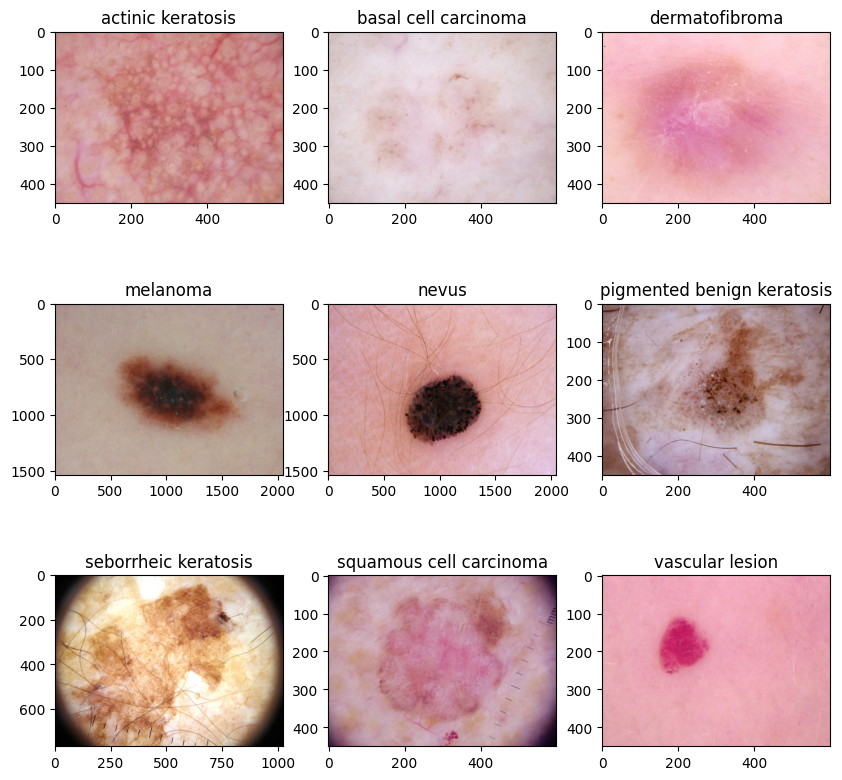

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for j in range(9):
  plt.subplot(3, 3, j + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[j]+'/*.jpg'))[1]))
  plt.title(class_names[j])
  plt.imshow(image)


The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Create the model**

Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [22]:
from keras.layers.convolutional.conv1d import Conv
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
num_classes =9
inputshape=(img_height,img_width,3)
# Sequentila model allows us to create the model layer by layer
model = Sequential()

# First convolution layer.
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=inputshape))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Second convolution layer.
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Third convulation layer.
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Using Flatten function flattens the multi-dimensional input tensors into a single dimension
model.add(Flatten())

# Dense Layer1
model.add(Dense(512,activation='relu'))

# Dense Layer2
model.add(Dense(128,activation='relu'))

#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(Dense(num_classes, activation = "softmax"))

**Compile the model**

Choose an appropirate optimiser and loss function for model training

In [23]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
# View the summary of all layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 41, 41, 128)      

**Train the model**







In [26]:
epochs = 20
history = model.fit(train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/20
56/56 [==============================] - 107s 2s/step - loss: 0.5440 - accuracy: 0.8008 - val_loss: 2.1064 - val_accuracy: 0.4631
Epoch 2/20
56/56 [==============================] - 106s 2s/step - loss: 0.4297 - accuracy: 0.8477 - val_loss: 2.2276 - val_accuracy: 0.4877
Epoch 3/20
56/56 [==============================] - 106s 2s/step - loss: 0.3771 - accuracy: 0.8544 - val_loss: 2.3719 - val_accuracy: 0.4810
Epoch 4/20
56/56 [==============================] - 106s 2s/step - loss: 0.3162 - accuracy: 0.8694 - val_loss: 2.9225 - val_accuracy: 0.5034
Epoch 5/20
56/56 [==============================] - 108s 2s/step - loss: 0.3088 - accuracy: 0.8756 - val_loss: 2.8012 - val_accuracy: 0.4698
Epoch 6/20
56/56 [==============================] - 106s 2s/step - loss: 0.3113 - accuracy: 0.8783 - val_loss: 2.8920 - val_accuracy: 0.4810
Epoch 7/20
56/56 [==============================] - 106s 2s/step - loss: 0.2504 - accuracy: 0.8968 - val_loss: 3.5669 - val_accuracy: 0.5078
Epoch 8/20
56

**Visualizing training results**


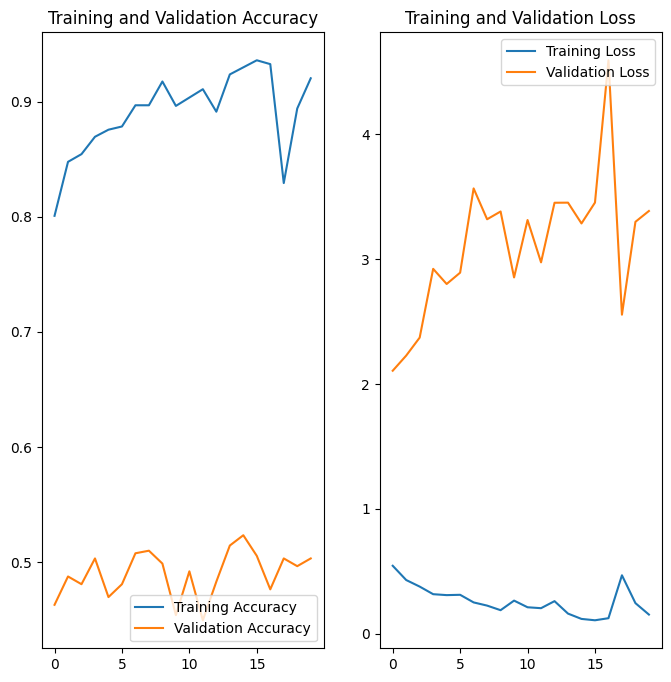

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Model is overfitting. From the above Training vs Validation accuracy graph we can see that as the epoch increases the difference between Training accuracy and validation accuracy increases.

In [28]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.

rescale = tf.keras.Sequential([
  #To rescale an input in the [0, 255] range to be in the [0, 1] range
  layers.experimental.preprocessing.Rescaling(1./255)])

data_augmentation = tf.keras.Sequential([
  #Randomly flip each image horizontally and vertically.
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),

  #Randomly rotate each image.
  layers.experimental.preprocessing.RandomRotation(0.2),

  #Randomly zoom each image during training.
  layers.experimental.preprocessing.RandomZoom(0.2),

  #Randomly translate each image during training.
  layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)])

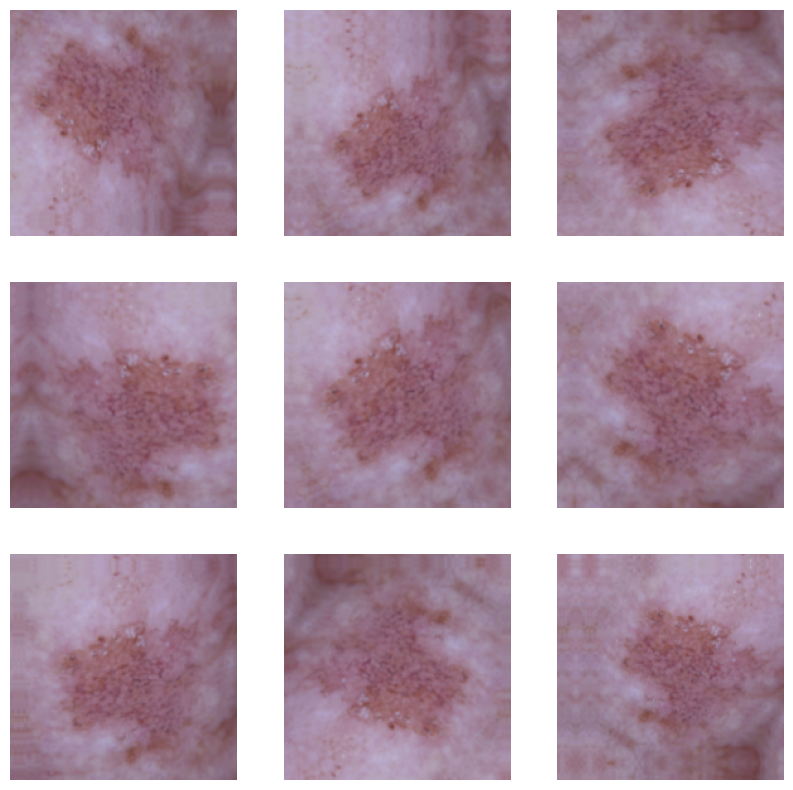

In [30]:
# Todo, visualize how your augmentation strategy works for one instance of training image.


plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Todo:**


**Create the model, compile and train the model**

In [31]:
## New Model 2 Creation

## Dropout layer: randomly sets input units to 0 with a frequency of rate at each step during training time,
## which helps prevent overfitting.Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.



from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

num_classes = 9

#Sequential allows you to create models layer-by-layer

model_2 = Sequential()

#Augmentation layer
model_2.add(data_augmentation)

#Rescaling layer
model_2.add(rescale)

#First Convulation Layer
model_2.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model_2.add(Dropout(0.25))

#Second Convulation Layer
model_2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model_2.add(Dropout(0.25))

#Third Convulation Layer
model_2.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))

#Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model_2.add(Flatten())

#Dense Layer
model_2.add(Dense(512,activation='relu'))

#Dense Layer
model_2.add(Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model_2.add(Dropout(0.50))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model_2.add(Dense(num_classes,activation='softmax'))

**Compiling the model**



In [32]:
model_2.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

**Training the model**


In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs =20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/20
56/56 [==============================] - 121s 2s/step - loss: 0.0947 - accuracy: 0.9403 - val_loss: 3.8034 - val_accuracy: 0.5101
Epoch 2/20
56/56 [==============================] - 109s 2s/step - loss: 0.0963 - accuracy: 0.9420 - val_loss: 3.9188 - val_accuracy: 0.5056
